# Cuphead AI

This project aims to create an Artificial Intelligence (AI) that learns to play against a boss in the game Cuphead.

### Install required external modules

Before being able to run code on this notebook, you'll need some external modules. For that, run the command below and restart your Jupyter kernel.

In [ ]:
# Install external modules
%pip install -r requirements.txt

### Screenshot game

The game window is captured using `win32api`. The function `WindowCapture.get_screenshot()` returns a numpy array that can be read by OpenCV.

The game must be running in windowed mode. Borders are removed considering a resolution of **640x400** (set in game).

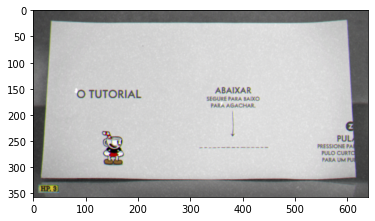

In [11]:
from matplotlib import pyplot as plt
from src.game_interface.window_capture import WindowCapture

window_capture = WindowCapture()
image = window_capture.get_screenshot()

plt.imshow(image)
plt.show()

### Execute Action in game

The keypresses are executed simulating a keyboard using `pyautogui`. That means the game should be open and in the foreground to register actions (as the foreground application will receive those keypresses).

**Available Actions:**

`UP | DOWN | LEFT | RIGHT | SHOOT | JUMP | DASH`

In [5]:
# Game needs to be running and in the foreground
# Avoid other actions in this example as they will execute keypresses on this notebook
from src.game_interface.handle_action import HandleAction, Action

HandleAction.execute([Action.DASH, Action.RIGHT]) # press and hold for 0.1 second
HandleAction.hold(Action.DASH)
HandleAction.release(Action.DASH)
HandleAction.release_all()

### Feature Detection

First, **OpenCV** `matchTemplate` was being used. Unfortunately, object detection was not very reliable. Instead, it was replaced by **YOLOv5** (that is currently used to detect objects in the screenshot).

A new model for YOLOv5 was trained using images captured from the game. The tool **labelImg** was used to annotate labels to those images. More information on how to train a new model on YOLOv5 will be available on [`yolo_training.ipynb`](yolo_training.ipynb) notebook.

After training that new model, you'll need a `model.pt` file containing weight information about the model. That file can be imported in PyTorch (or using the `YoloDetection` class).

Using cache found in C:\Users\italohdc/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-5-30 Python-3.10.4 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce GTX 960M, 4096MiB)



Failed to set window to foreground


Fusing layers... 
YOLOv5n summary: 213 layers, 1775401 parameters, 0 gradients
Adding AutoShape... 


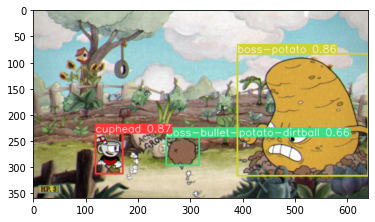

In [14]:
from src.game_interface.window_capture import WindowCapture
from src.feature_detection.yolo import YoloDetection
from matplotlib import pyplot as plt
import time
import cv2

window_capture = WindowCapture("Cuphead")
yolo = YoloDetection()
time.sleep(1)

screenshot = window_capture.get_screenshot()
prediction = yolo.detect_single_image(screenshot)
img_prediction = prediction.get_annotated_image()
img_prediction = cv2.cvtColor(img_prediction, cv2.COLOR_BGR2RGB)

%matplotlib inline
plt.imshow(img_prediction)
plt.show()